In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks
import numpy as np

In [57]:
# Cargar los datos desde un archivo CSV
data = pd.read_csv('data.csv')
print(data.dtypes)

Fecha               object
Hora (UTC)          object
Temperatura (C)    float64
dtype: object


In [58]:
# Verificar si hay valores NaN en la columna de temperatura
missing_data = data['Temperatura (C)'].isnull().sum()
print("Cantidad de valores NaN en Temperatura (C):", missing_data)

# Verificar si hay valores NA en la columna de temperatura
missing_data_na = data['Temperatura (C)'].isna().sum()
print("Cantidad de valores NA en Temperatura (C):", missing_data_na)


Cantidad de valores NaN en Temperatura (C): 9
Cantidad de valores NA en Temperatura (C): 9


### Explique cómo manejaron posibles datos faltantes en la serie de tiempo.

Podemos observar que la forma de manejrar los datos faltantes fue marcandolos como NAN/NA

In [70]:
data['FechaHora'] = pd.to_datetime(data['Fecha'] + ' ' + data['Hora (UTC)'], format='%d-%m-%Y %H:%M')

data.sort_values('FechaHora', inplace=True)

data.set_index('FechaHora', inplace=True)

data.drop(columns=['Fecha', 'Hora (UTC)'], inplace=True)

data['Temperatura (C)'].interpolate(method='linear', inplace=True)

KeyError: 'Fecha'

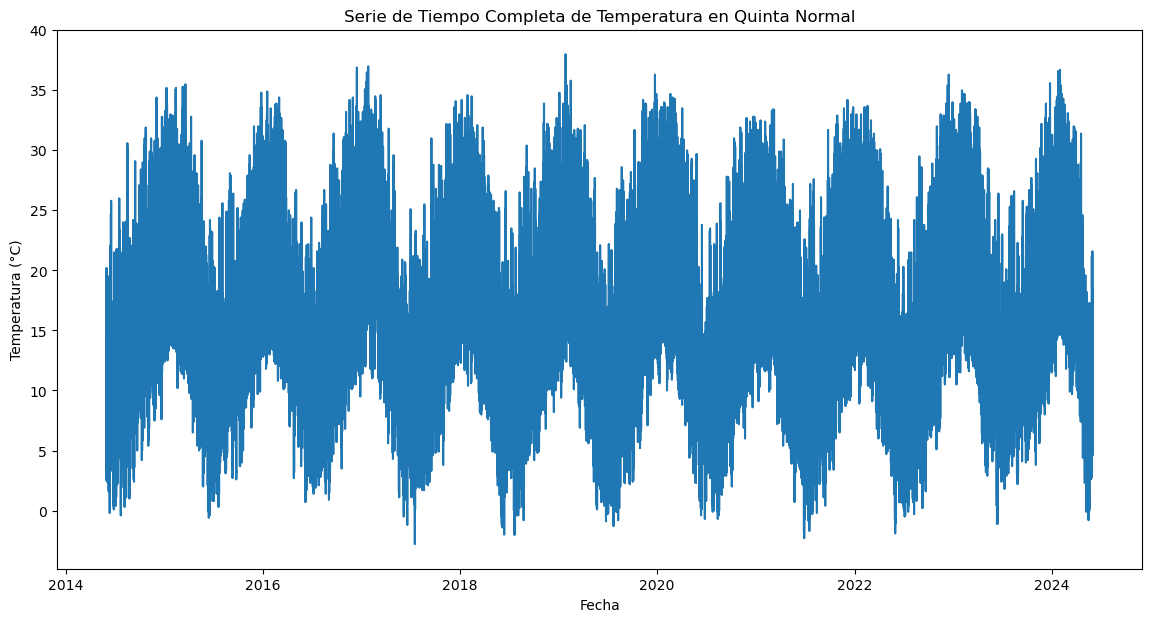

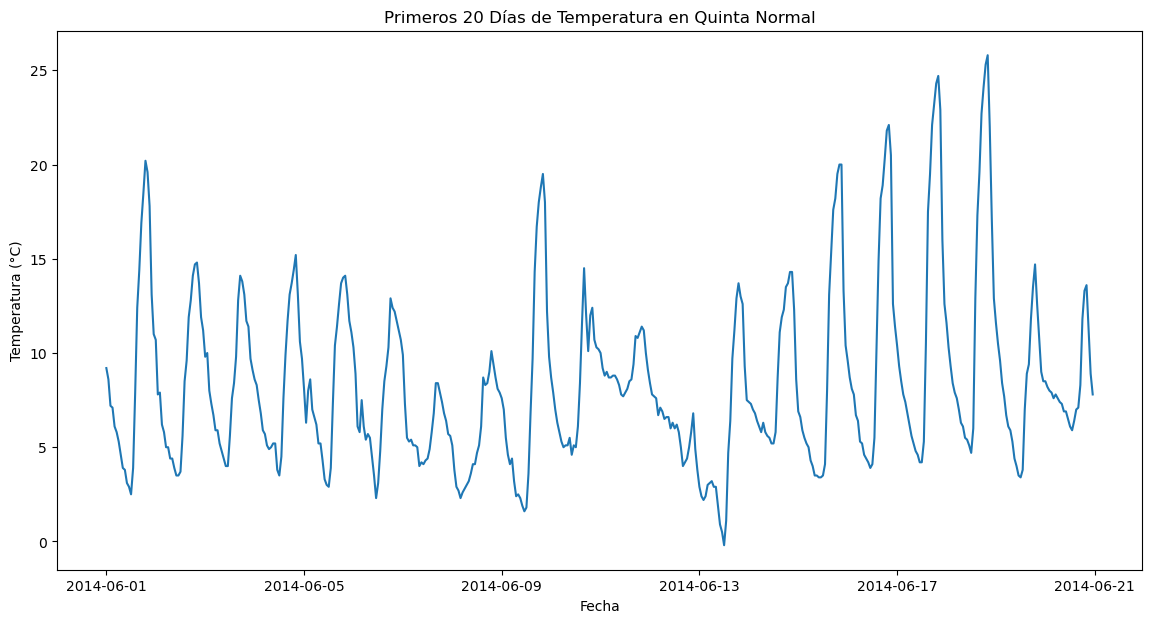

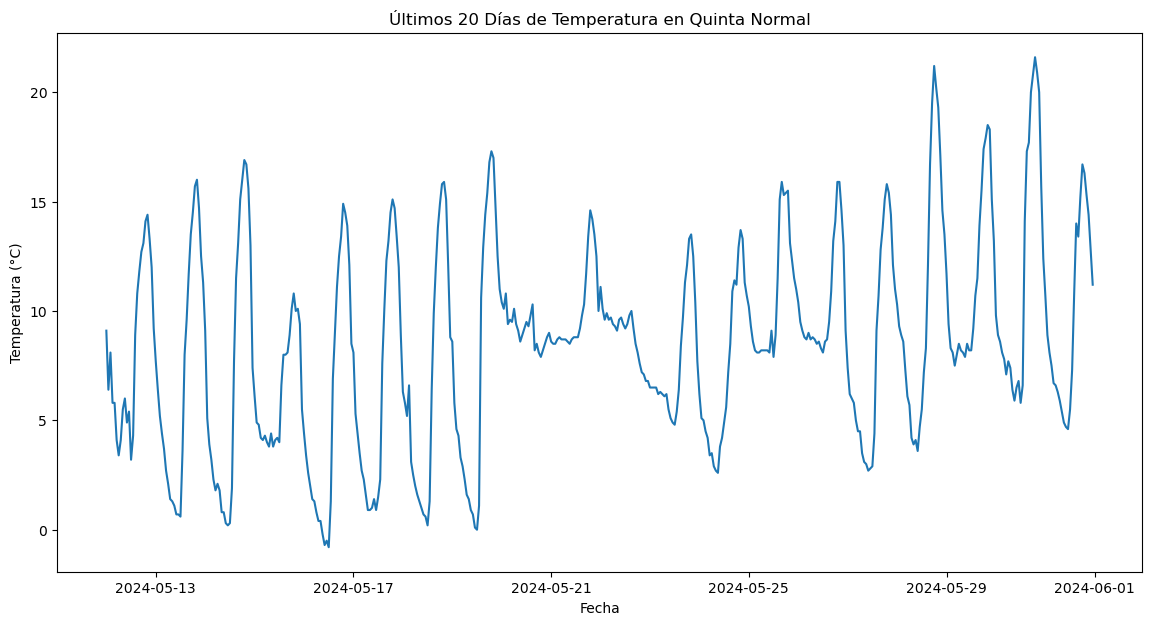

In [61]:
# Visualizar la serie de tiempo completa
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Temperatura (C)'])
plt.title('Serie de Tiempo Completa de Temperatura en Quinta Normal')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

# Visualizar los primeros 20 días (480 horas)
plt.figure(figsize=(14, 7))
plt.plot(data.index[:480], data['Temperatura (C)'].iloc[:480])  # 480 horas = 20 días
plt.title('Primeros 20 Días de Temperatura en Quinta Normal')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.show()

# Visualizar los últimos 20 días (480 horas)
plt.figure(figsize=(14, 7))
plt.plot(data.index[-480:], data['Temperatura (C)'].iloc[-480:])  # 480 horas = 20 días
plt.title('Últimos 20 Días de Temperatura en Quinta Normal')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.show()

### Explique cómo manejaron posibles datos faltantes en la serie de tiempo.

In [62]:
data.tail()

,Temperatura (C)
FechaHora,
2024-05-31 19:00:00,16.3
2024-05-31 20:00:00,15.3
2024-05-31 21:00:00,14.4
2024-05-31 22:00:00,12.8
2024-05-31 23:00:00,11.2


In [63]:
# Extraer la temperatura y el indice de tiempo
sampling_rate = 1  # número de mediciones por hora
temperature = data['Temperatura (C)'].values
time_samples = np.arange(len(temperature)) # número de horas
n_samples = len(data)


In [64]:
print(temperature)
print(time_samples)

[ 9.2  8.6  7.2 ... 14.4 12.8 11.2]
[    0     1     2 ... 87494 87495 87496]


Calculamos la transformada de Fourier de la temperatura con el algoritmo Real Fast Fourier Transform (RFFT). Además, calculamos las frecuencias que corresponden a la salida de la función de SciPy.

In [65]:
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(n_samples, 1 / sampling_rate)

In [66]:
temperature_fft_scaled = np.abs(temperature_fft) / (n_samples/2) # escalar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # escalar frecuencias de horas a días
frequency = 1 / 24 # la frecuencia es un día: 24 horas

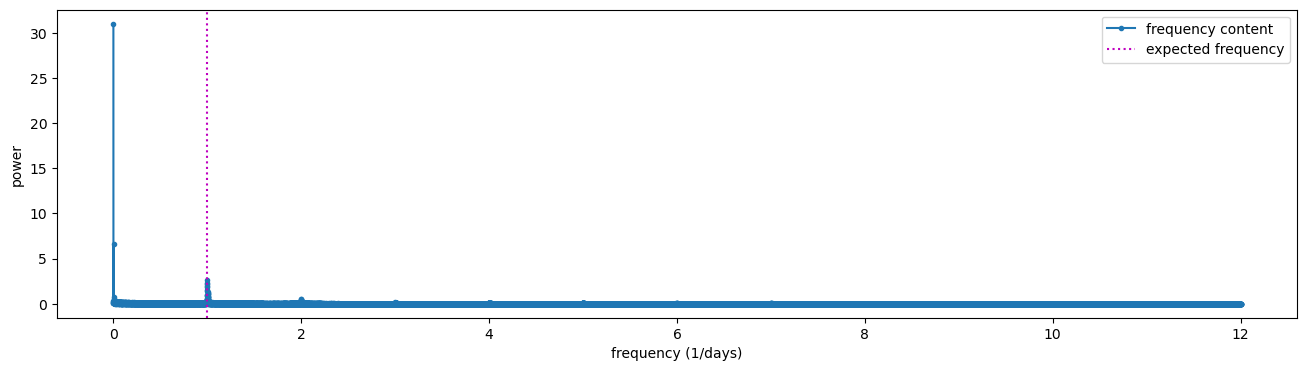

In [67]:
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()

/var/folders/rn/8kg7t05x7l3fy1mwbgcdkw240000gp/T/ipykernel_55782/125534697.py:2: RuntimeWarning: divide by zero encountered in divide
  periodos = 1 / freqs_fft


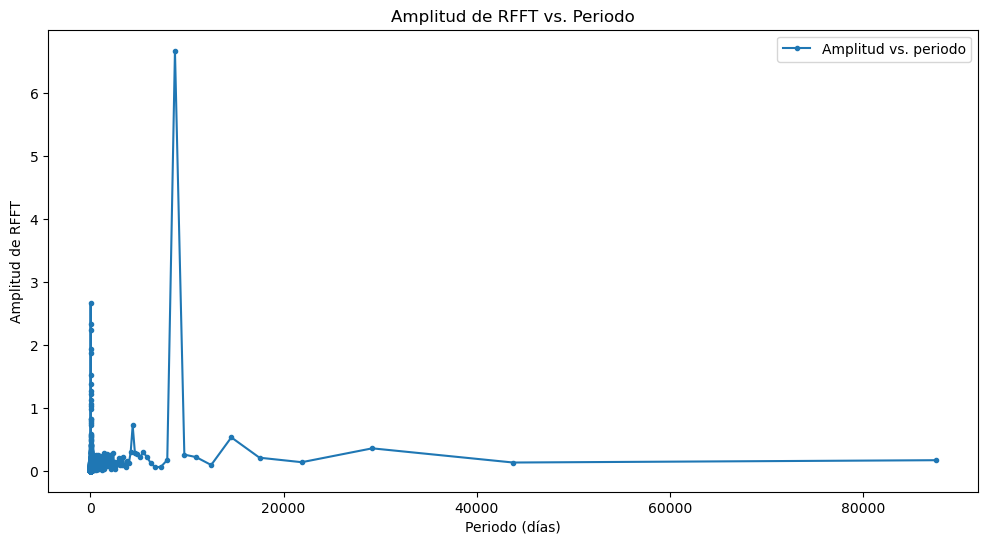

In [68]:
# Paso 6: Calcular el periodo en días para cada frecuencia y graficar
periodos = 1 / freqs_fft
amplitudes = temperature_fft_scaled

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(periodos, amplitudes, marker='.', linestyle='-', label='Amplitud vs. periodo')
ax.set_xlabel('Periodo (días)')
ax.set_ylabel('Amplitud de RFFT')
ax.set_title('Amplitud de RFFT vs. Periodo')
ax.legend()
plt.show()

Buscamos los peaks con una altura de al menos un grado Celsius.

In [69]:
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in [0] + list(peaks):
    print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")

Amplitude at frequency of 0.0 per day is 31.009795764426215 degrees Celsius.
Amplitude at frequency of 0.002742951186897836 per day is 6.6638770010320245 degrees Celsius.
Amplitude at frequency of 0.9989828222681919 per day is 1.519707421732447 degrees Celsius.
Amplitude at frequency of 1.0000800027429513 per day is 2.3283954955839317 degrees Celsius.
Amplitude at frequency of 1.0011771832177103 per day is 2.668836629811897 degrees Celsius.
Amplitude at frequency of 1.0022743636924694 per day is 1.263388681374878 degrees Celsius.


#### Responde las preguntas siguientes.
a) Explique cómo se puede encontrar la temperatura promedia de los diez años en los resultados de RFFT.

b) Explique cómo se puede detectar las oscilaciones anuales en los
resultados de RFFT.

c) Explique cuantos grados Celsius aproximadamente hay en la dife-
rencia promedia entre verano e invierno, en base a los resultados
de RFFT.

d ) Explique cómo se puede detectar las oscilaciones diarias en los
resultados de RFFT.

e) Explique cántos grados Celsius aproximadamente hay en la diferencia promedia entre día y noche, en base a los resultados de
RFFT.